In [ ]:
! pip install ipywidgets
! pip install ipyml

In [2]:
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [32]:
df = pd.read_csv("MAL-manga.csv")

In [33]:
df.head()

,Unnamed: 0,Title,Rank,Type,Volumes,Published,Members,page_url,image_url,Score
0,0,City Hunter,460,Manga,35,Feb 1985 - Nov 1991,14690,https://myanimelist.net/manga/792/City_Hunter,https://cdn.myanimelist.net/r/100x140/images/m...,8.16
1,1,Keijo!!!!!!!!,4532,Manga,18,Jul 2013 - Apr 2017,12689,https://myanimelist.net/manga/56505/Keijo,https://cdn.myanimelist.net/r/100x140/images/m...,7.31
2,2,Rain,1808,Manga,?,Nov 2008 -,12021,https://myanimelist.net/manga/17237/Rain,https://cdn.myanimelist.net/r/100x140/images/m...,7.67
3,3,Hidari no Futari,17377,One-shot,?,2011 - 2011,1010,https://myanimelist.net/manga/26610/Hidari_no_...,https://cdn.myanimelist.net/r/100x140/images/m...,5.95
4,4,Odd Girl Out,953,Manhwa,?,May 2015 -,4968,https://myanimelist.net/manga/119521/Odd_Girl_Out,https://cdn.myanimelist.net/r/100x140/images/m...,7.90


Dropdown(description='X-axis:', options=('Manga', 'One-shot', 'Manhwa', 'Light-Novel', 'Doujinshi', 'Manhua', …

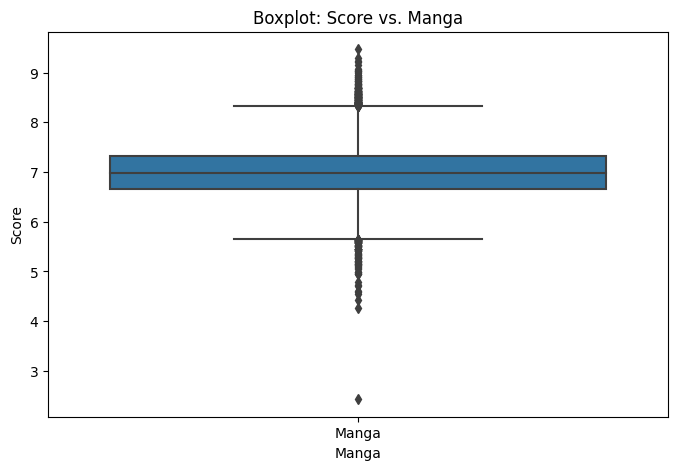

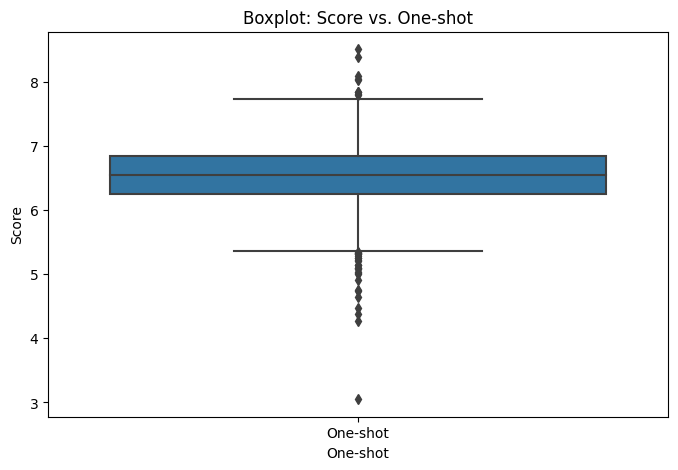

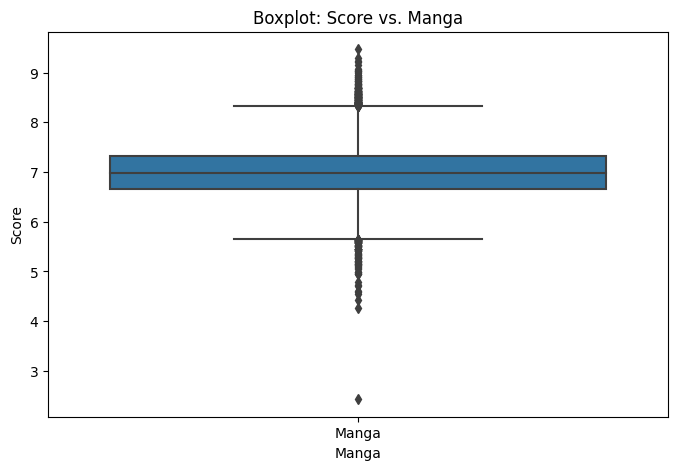

In [39]:
def interactive_boxplot(x):
    plt.figure(figsize=(8, 5))
    filtered_df = df[df['Type'] == x]  # Filter DataFrame based on the selected type
    sns.boxplot(x='Type', y='Score', data=filtered_df)  # Use 'Type' as x-axis to show the specific type
    plt.title(f'Boxplot: Score vs. {x.capitalize()}')
    plt.xlabel(x.capitalize())
    plt.ylabel('Score')
    plt.show()

# Create dropdown menu for the x-axis (categorical variable)
x_dropdown = widgets.Dropdown(options=df['Type'].unique(), description='X-axis:')

# Define the interaction between widgets and plot function
def update_boxplot(*args):
    x_value = x_dropdown.value
    interactive_boxplot(x_value)

# Link widgets to the update_boxplot function
x_dropdown.observe(update_boxplot, 'value')

# Display the widget (dropdown menu)
display(x_dropdown)

# Check if the DataFrame is empty before calling the initial box plot
if len(df) > 0:
    x_value = x_dropdown.value
    interactive_boxplot(x_value)  # Initial box plot with the selected x-variable
else:
    print("The DataFrame 'df' is empty. Please check your data.")